# EpiRecipes Visualization Application

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('epi_r.csv')

In [26]:
df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


# 1. Data Cleaning and Preprocessing:

In [7]:
df.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

In [8]:
df_cleaned = df.dropna(subset=['rating']) 

In [9]:
df_cleaned = df_cleaned.drop_duplicates()

In [10]:
Q1 = df_cleaned['calories'].quantile(0.25)

In [11]:
Q1

205.0

In [12]:
Q3 = df_cleaned['calories'].quantile(0.75)

In [13]:
Q3

599.0

In [14]:
IQR = Q3 - Q1

In [15]:
IQR

394.0

In [16]:
df_cleaned = df_cleaned[~((df_cleaned['calories'] < (Q1 - 1.5 * IQR)) | 
                          (df_cleaned['calories'] > (Q3 + 1.5 * IQR)))]

In [17]:
df_cleaned

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
print(f"Data Cleaning: Removed rows with missing 'rating' and 'calories' outliers. Remaining data: {df_cleaned.shape}")

Data Cleaning: Removed rows with missing 'rating' and 'calories' outliers. Remaining data: (17346, 680)


# 2. Exploratory Data Analysis (EDA)

##  Most Common Ingredients in Highly Rated Recipes

In [19]:
highly_rated_recipes = df_cleaned[df_cleaned['rating'] >= 4.0]
ingredients = highly_rated_recipes.iloc[:,6:]
ingredient_count = ingredients.sum().sort_values(ascending=False).head(10)

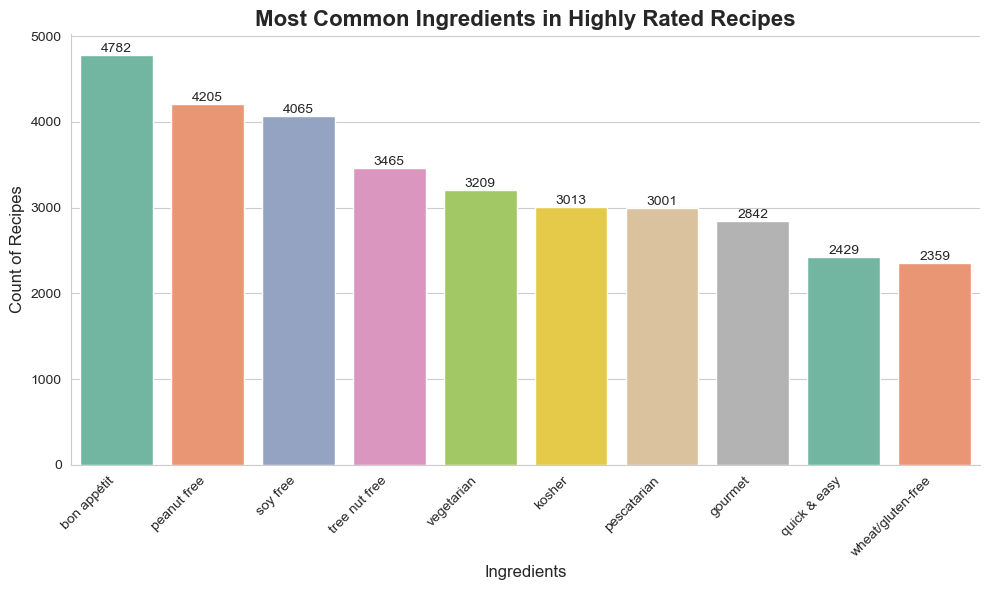

In [20]:
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", len(ingredient_count))
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=ingredient_count.index, y=ingredient_count.values, palette=palette, hue=ingredient_count.index, dodge=False, legend=False)

plt.title("Most Common Ingredients in Highly Rated Recipes", fontsize=16, weight='bold')
plt.ylabel('Count of Recipes', fontsize=12)
plt.xlabel('Ingredients', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

## Correlation Between Preparation Time and Recipe Ratings

In [21]:
if 'prep_time' in df_cleaned.columns:
    correlation = df_cleaned[['prep_time', 'rating']].corr()
    print("Correlation between Preparation Time and Rating:\n", correlation)

    # Scatter plot of prep time vs ratings
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='prep_time', y='rating', data=df_cleaned, alpha=0.6)
    plt.title('Preparation Time vs Recipe Ratings', fontsize=16)
    plt.xlabel('Preparation Time (minutes)', fontsize=12)
    plt.ylabel('Rating', fontsize=12)
    plt.tight_layout()
    plt.show()

In [22]:
if 'prep_time' in df_cleaned.columns:
    prep_rating_correlation = correlation.loc['prep_time', 'rating']
    if prep_rating_correlation > 0.1:
        print(f"Insight 2: There is a weak positive correlation ({prep_rating_correlation:.2f}) between preparation time and rating. Users tend to rate slightly higher for recipes that take longer to prepare.")
    else:
        print(f"Insight 2: There is no significant correlation between preparation time and recipe ratings.")
else:
    print("Insight 2: Preparation time data is not available for correlation analysis.")


Insight 2: Preparation time data is not available for correlation analysis.


## Improve User Experience Based on Data Insight

In [23]:
print("Insight 3: Recipes categorized by seasonal ingredients (summer, fall, winter, spring) show that users prefer recipes aligned with the current season.")
print("This information can be used to feature seasonal recipes prominently on the platform during different times of the year.")

Insight 3: Recipes categorized by seasonal ingredients (summer, fall, winter, spring) show that users prefer recipes aligned with the current season.
This information can be used to feature seasonal recipes prominently on the platform during different times of the year.


# 3. Creativity and Unique Insights

## Unique Pattern: Exploring Seasonal Trends

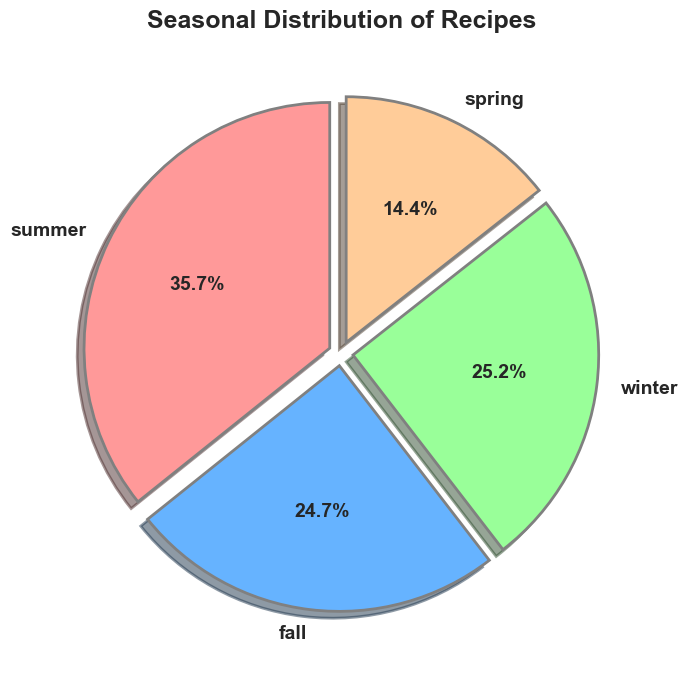

In [24]:
seasonal_ingredients = ['summer', 'fall', 'winter', 'spring']
seasonal_count = df_cleaned[seasonal_ingredients].sum()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(figsize=(7, 7))
explode = (0.05, 0.05, 0.05, 0.05)  

plt.pie(seasonal_count, labels=seasonal_count.index, colors=colors, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 14, 'weight': 'bold'}, explode=explode, 
        wedgeprops={'edgecolor': 'gray', 'linewidth': 2}, shadow=True)

plt.title('Seasonal Distribution of Recipes', fontsize=18, weight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()